<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Netanel Landesman   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [2]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

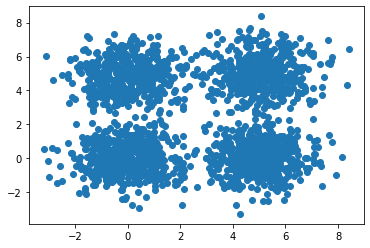

In [3]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [4]:
from logging import lastResort
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300, plotting = False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.plotting = plotting
        
        self.X_fit_ = None      
        
        self.labels_ = None     

        self.centroids = None   

        self.labels_history = []    
        
        self.centroids_history = [] 

        self.costs = []             


    def fit(self, X):
        self.X_fit_ = X
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, size=self.n_clusters, replace=False)]

        for i in range(self.max_iter):
            new_labels = self._get_labels(self.X_fit_)
            if np.array_equal(self.labels_, new_labels):
              break
            self.labels_ = new_labels
            self.labels_history.append(self.labels_)
            cost = self._calculate_cost(self.X_fit_)
            self.costs.append(cost)
            self.centroids_history.append(self.centroids)
            self.centroids = self._get_centroids(self.X_fit_ , self.labels_)
            if self.plotting:
              plt.rcParams['figure.figsize'] = 5,30
              plt.subplot(10, 1, i + 1)
              plt.scatter(X[:, 0] , X[:, 1] , c = self.labels_ , cmap= 'viridis')
              plt.scatter([c[0] for c in self.centroids], [c[1] for c in self.centroids], c = 'red')
              plt.title(f"Iteration number {i + 1}:")


    def predict(self, X):
        predict = self._get_labels(X)
        return predict


    def _get_distances(self, X):
        distances = []
        for center in self.centroids:
          dist = np.sqrt(np.sum((X - center)**2))
          distances.append(dist)
        return distances
    
    def _get_labels(self, X):
        labels = []
        for x in X:
            distances = self._get_distances(x)
            label = np.argmin(distances)
            labels.append(label)
        return labels


    def _get_centroids(self, X, labels):
        new_centroids_list = []
        for label in range(self.n_clusters):
          samples_with_same_label = []
          for i in range (len(X)):
            if labels[i] == label:
              samples_with_same_label.append(X[i])
          new_centroids_list.append(np.mean(samples_with_same_label, axis = 0))
        return new_centroids_list


    
    def _calculate_cost(self, X):
        cost = 0
        for x, label in zip(X, self.labels_):
          cost += np.sqrt(np.sum((x - self.centroids[label])**2))
        return cost




Run the algorithm on the 2D dataset

In [5]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)


Plot a graph of the costs as a function of the iterations

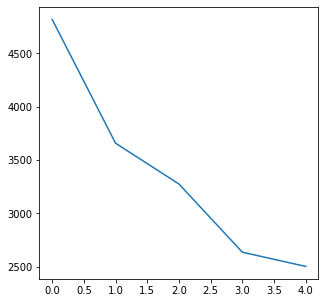

In [6]:
costs = kmeans.costs
plt.rcParams['figure.figsize'] = 5,5
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 5455.004422696496 <br> 
3 clusters: 3855.715091996072 <br>
4 clusters: 2460.9342046837664 <br>
6 clusters: 2219.347828159237 <br>
8 clusters: 1987.9622542259362 <br>
10 clusters: 1829.855029685193 <br>
20 clusters: 1348.5079970514184 <br>

In [7]:
n_clusters_list = [2, 3, 4, 6, 8, 10, 20]
for n_clusters in n_clusters_list:
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  print(f"The final cost of {n_clusters} clusters is: {kmeans.costs[-1]}")

The final cost of 2 clusters is: 5349.601221791128
The final cost of 3 clusters is: 3885.0080806982824
The final cost of 4 clusters is: 2501.890267347767
The final cost of 6 clusters is: 2287.3991878570205
The final cost of 8 clusters is: 2028.4224690117733
The final cost of 10 clusters is: 1816.5422469185255
The final cost of 20 clusters is: 1362.8130033228015


Now write a code that plots the clusters and the locations of the centroids at each iteration

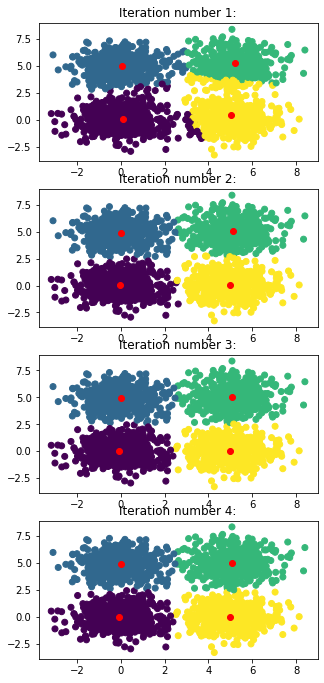

In [8]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, plotting = True)
kmeans.fit(X)


<ipython-input-9-7a12e15d0aa8>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 7, count)


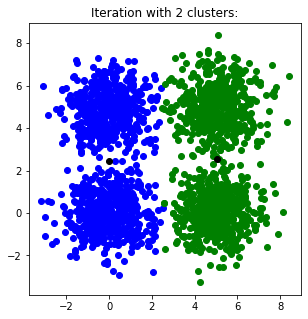

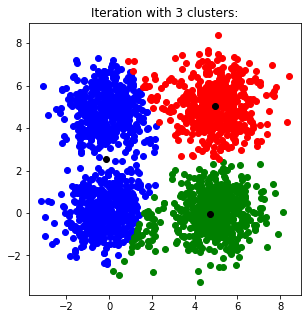

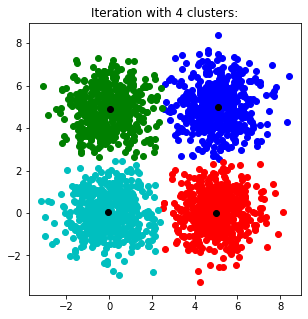

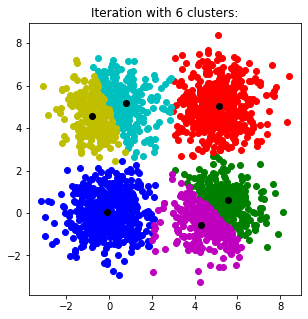

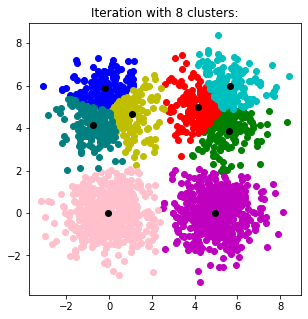

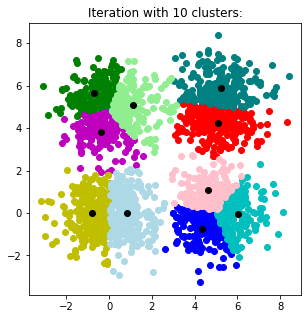

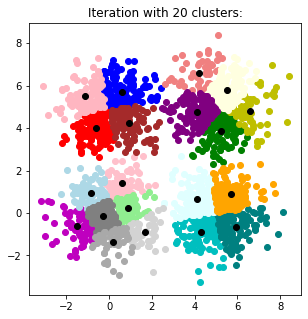

In [9]:
n_clusters_list = [2, 3, 4, 6, 8, 10, 20]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink', 'teal', 'lightblue', 'lightgreen',
          'lightcoral', 'lightcyan', 'lightpink', 'lightyellow', 'gray', 'lightgray',
          'darkgray', 'purple', 'orange', 'brown']
count = 1
for n_clusters in n_clusters_list:
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  center = kmeans.centroids
  for label in range(n_clusters):
    same_center = []
    labels = kmeans.labels_
    for i in range (len(X)):
      if labels[i] == label:
        same_center.append(X[i])
    plt.rcParams['figure.figsize'] = 40, 5
    plt.subplot(1, 7, count)
    plt.scatter([t[0] for t in same_center], [t[1] for t in same_center], c = colors[label])
    plt.scatter(center[label][0], center[label][1], c = 'black')
  plt.title(f"Iteration with {label + 1} clusters:")
  count += 1
  plt.show()




## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [10]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [11]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [12]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        # mean center the data
        self.mean = np.mean(X)
        X = X - self.mean
        # calculate the covariance matrix
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # sort the eigenvectors by descending eigenvalues
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        self.V = eigenvectors
        
        return self.V

    def transform(self, X, n_dimentions):
        # mean center the data
        X = X - self.mean
        
        # reduce the data to the first n_dimentions principal components
        X_reduced = np.dot(X, self.V[:, :n_dimentions])
        
        return X_reduced



Run the algorithm on MNIST dataset.

In [13]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

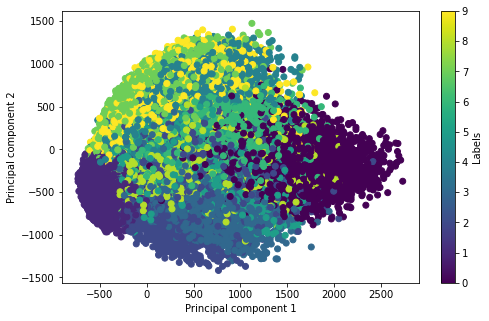

In [14]:
y = [int(label) for label in y]
plt.rcParams['figure.figsize'] = 8,5
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

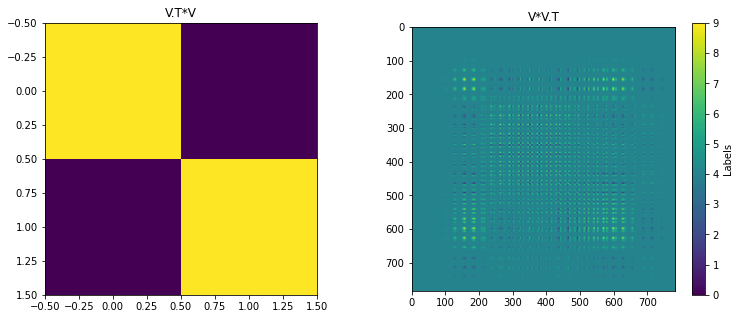

In [15]:
r = 2
V =  pca.V[:, :r]
VTV = V.T @ V
VVT = V @ V.T

plt.rcParams['figure.figsize'] = 13,5

fig, (p1, p2) = plt.subplots(1,2)
p1.imshow(VTV)
p1.set_title('V.T*V')
p2.imshow(VVT)
p2.set_title('V*V.T')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')
plt.show()



<font color='blue'>
There is the differnece between the two matrices:<br> The matrix VTV is a r x r matrix, (r is the number of dimensions in the reduced space) and the matrix VVT is a d x d matrix (d is the number of dimensions in the original space)<br> 
this differnece represents the projection of the original data onto the reduced space (r x r matrix) the closer r is to d, the meaning of this is more prinicibal components taken, so the closer the dot product. And when r is really equal to d it's already the idenity matrix.


Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [26]:
def pca_reconstruction(x, n_dimentions):
    # Reconstruct the data back to the original space
    x = x - np.mean(x)
    x_reconstructed = np.dot(x, pca.V[:, :n_dimentions].T) 

    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>
<font color='blue'>
It can be noticed that the higher the number of n_dimensions, the more similar we get to the original image. As we have already said above.

<br><br>
Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


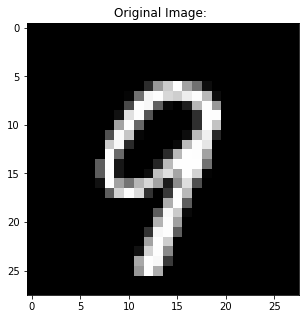

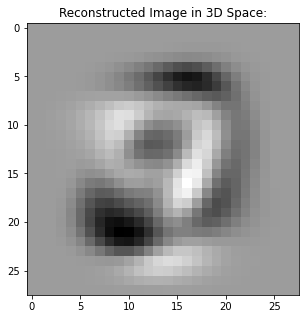

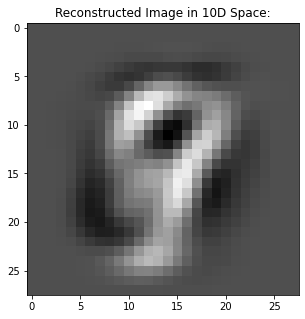

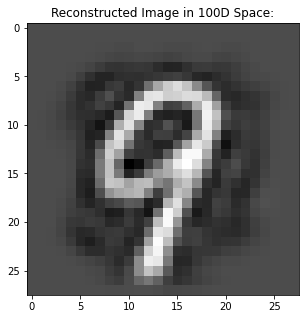

In [28]:
import random
rand_idx = random.randint(0, len(X))
random_image = X[rand_idx]
random_image_label = y[rand_idx]

# Plot the original image:
plt.figure()
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"Original Image: ")

pca = PCA()
pca.fit(X)

dimensions = [3, 10, 100]
for dim in dimensions:
  # Project the data to 3D space
  X_projected = pca.transform(X,dim)
  random_image_reconstructed = pca_reconstruction(X_projected[rand_idx], dim)

  # Plot the reconstructed image
  plt.figure()
  plt.imshow(random_image_reconstructed.reshape(28, 28), cmap='gray')
  plt.title(f"Reconstructed Image in {dim}D Space:")

